In [13]:
conda install -c conda-forge dask-image

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.7.12
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /gext/nezar.lheimeur/hduser/conda/envs/spark-env

  added / updated specs:
    - dask-image


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    dask-image-0.5.0           |     pyhd8ed1ab_1          41 KB  conda-forge
    openssl-1.1.1j             |       h7f98852_0         2.1 MB  conda-forge
    pims-0.5                   |     pyh9f0ad1d_1          66 KB  conda-forge
    slicerator-1.0.0           |             py_0          12 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.2 MB

The following NEW packages will be INSTALLED:

  dask-image       

In [32]:
# Importing required libraries

import numpy as np
from dask_image import imread
import dask.array as da
from scipy.ndimage.filters import median_filter
import matplotlib.pyplot as plt


In [6]:
def partial_median(block):
    return median_filter(block, footprint=np.ones((3,3,1)))


In [28]:
# image path 
img_init = "lena_noisy.jpg"

#import the image as a chunck array
dask_img = imread.imread(img_init)

#visualize it
dask_img[0]

dask.array<getitem, shape=(128, 128, 3), dtype=uint8, chunksize=(128, 128, 3), chunktype=numpy.ndarray>

In [29]:
#defining chunck sizes
bloc_size_x = 8
bloc_size_y = 8

#splitting our image chunck into smaller chunck
dask_chunked_img = dask_img[0].rechunk(chunks=(bloc_size_x, bloc_size_y, 3))

#let's visualize it
dask_chunked_img

,Array,Chunk
Bytes,49.15 kB,192 B
Shape,"(128, 128, 3)","(8, 8, 3)"
Count,514 Tasks,256 Chunks
Type,uint8,numpy.ndarray


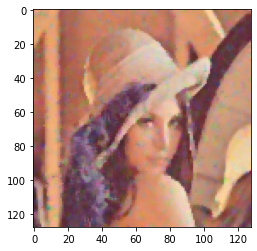

saving resulting image


<Figure size 432x288 with 0 Axes>

In [48]:
# apply the filter over overlaped chuck to generate the image
filtered_img = dask_chunked_img.map_overlap(partial_median, depth={0:1,1:1}, boundary='nearest')

imgplot=plt.imshow(filtered_img)
plt.show()

print("saving resulting image")
plt.savefig("lena_filter_dask.jpg")
